In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv',header= 'infer')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X = df.drop('charges',axis=1)
y = df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)



In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(1)                        
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=.01),
              metrics =['mae'] )

In [8]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8481890150>>

In [9]:
history = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13140.6761 - mae: 13140.6761
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 8053.2975 - mae: 8053.2975
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 6549.7351 - mae: 6549.7351
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 3957.1635 - mae: 3957.1635
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 3371.3384 - mae: 3371.3384
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 3163.4294 - mae: 3163.4294
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3200.5155 - mae: 3200.5155
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 3421.1679 - mae: 3421.1679
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 3061.9173 - mae: 3061.9173
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3061.6407 - mae: 3061.64

In [10]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1784.4847 - mae: 1784.4847


[1784.4847412109375, 1784.4847412109375]

Text(0.5, 0, 'epochs')

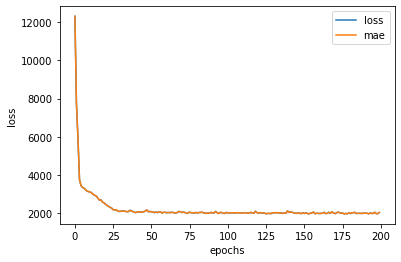

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')